## Pandas - Análisis de datos


In [94]:
import pandas as pd

## Análisis de la liga española

In [95]:
df = pd.read_csv("dataset_la_liga.csv")

In [96]:
df.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Real Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanyol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7


In [97]:
df.describe()

,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,9.582599,4.118943,4.118943,9.582599,13.701542,13.701542,9.577093,36.980176,50.681718,29.508811,18.267621,47.776432,47.776432,0.000000
std,3.107555,2.776725,2.531206,3.092974,4.966050,4.589442,2.986852,2.522150,14.104626,9.757192,7.569011,15.593429,11.855507,21.680653
min,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,30.000000,13.000000,11.000000,4.000000,15.000000,18.000000,-64.000000
25%,7.000000,2.000000,2.000000,8.000000,10.000000,11.000000,7.000000,34.000000,42.000000,23.000000,13.000000,37.000000,39.000000,-14.000000
50%,9.000000,4.000000,4.000000,10.000000,13.000000,14.000000,9.000000,38.000000,48.000000,28.000000,17.000000,45.000000,47.000000,-3.000000
75%,12.000000,6.000000,6.000000,12.000000,16.000000,17.000000,12.000000,38.000000,59.000000,34.000000,22.000000,54.000000,56.000000,10.250000
max,19.000000,16.000000,15.000000,18.000000,32.000000,29.000000,18.000000,44.000000,100.000000,78.000000,58.000000,121.000000,94.000000,89.000000


In [98]:
df.info() #De tocas las columnas cuenta las que no son null y tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
season             908 non-null object
club               908 non-null object
home_win           908 non-null int64
away_win           908 non-null int64
home_loss          908 non-null int64
away_loss          908 non-null int64
matches_won        908 non-null int64
matches_lost       908 non-null int64
matches_drawn      908 non-null int64
total_matches      908 non-null int64
points             908 non-null int64
home_goals         908 non-null int64
away_goals         908 non-null int64
goals_scored       908 non-null int64
goals_conceded     908 non-null int64
goal_difference    908 non-null int64
dtypes: int64(14), object(2)
memory usage: 113.6+ KB


In [99]:
#Cuales han sido los equipos que han ganado la liga por temporada
# df_campeones_por_temporada = df.sort_values('points', ascending =False) te dá 908 filas
df_campeones_por_temporada = df.sort_values('points', ascending =False).drop_duplicates(['season'])


In [100]:
df_campeones_por_temporada.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
807,2011-12,Real Madrid,16,16,1,1,32,2,4,38,100,70,51,121,32,89
827,2012-13,Barcelona,18,14,0,2,32,2,4,38,100,63,52,115,40,75
767,2009-10,Barcelona,18,13,0,1,31,1,6,38,99,57,41,98,24,74
787,2010-11,Barcelona,16,14,1,1,30,2,6,38,96,46,49,95,21,74
867,2014-15,Barcelona,16,14,2,2,30,4,4,38,94,64,46,110,21,89


In [101]:
df_campeones_por_temporada.head().size

80

In [102]:
df_campeones_por_temporada_2 = df.sort_values('points', ascending =False).drop_duplicates(['season']).sort_values('season')[['season','club','points']]  


In [103]:
df_campeones_por_temporada_2.head()

,season,club,points
15,1970-71,Barcelona,62
33,1971-72,Real Madrid,66
51,1972-73,Atletico de Madrid,68
69,1973-74,Barcelona,71
87,1974-75,Real Madrid,70


In [104]:
#Cual es  el equipo que mas veces ha ganado la liga?
df_campeones_por_temporada_2[['club','season']].groupby(by='club').count().sort_values('season', ascending=False)


,season
club,
Real Madrid,20
Barcelona,18
Atletico de Madrid,4
Valencia,2
Athletic Club,1
Deportivo,1
Real Sociedad,1


In [105]:
f = df_campeones_por_temporada_2[['club','season']].groupby(by='club').count().sort_values('season', ascending=False)


In [106]:
f[f['season'] == int(f.max())]

,season
club,
Real Madrid,20


In [107]:
df_perdedores_por_temporada_2 = df.sort_values('points').drop_duplicates(['season']).sort_values('season')[['season','club','points']]  
df_perdedores_por_temporada_2.head()

,season,club,points
0,1970-71,Real Zaragoza,18
16,1971-72,Sabadell,30
34,1972-73,Burgos,33
52,1973-74,Real Oviedo,33
70,1974-75,Murcia,30


In [108]:
#Cual es  el equipo que mas veces ha ganado la liga?
df_perdedores_por_temporada_2[['club','season']].groupby(by='club').count().sort_values('season').iloc[:5]


,season
club,
AD Almeria,1
Sevilla,1
Real Oviedo,1
Real Burgos,1
Numancia,1


In [109]:
#Cuales fueron los tres años en el que se obtuvieron los mas altos puntajes
tres_ganadores = df[['season','points']].groupby('season').sum().sort_values('points',ascending=False)
tres_ganadores.head(3)


,points
season,
1996-97,1267
1995-96,1256
1986-87,1087


In [110]:
#Cuales son los tres equipos que mas veces han ganado como locales
ganadores_locales=df[['club','home_win']].groupby('club').sum().sort_values(by='home_win', ascending=False)
ganadores_locales.head(3)

,home_win
club,
Real Madrid,663
Barcelona,652
Atletico de Madrid,520


In [111]:
#Si sevilla va a jugar con Villareal.¿Por cual deberia apostar?

df[df['club']=='Sevilla'].describe()

,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.439024,4.341463,3.658537,9.512195,14.780488,13.170732,9.024390,36.975610,53.365854,30.146341,19.097561,49.243902,45.439024,3.804878
std,2.335046,2.798301,2.092961,2.460914,3.636703,3.121718,2.361015,2.650357,9.971851,6.687903,6.992156,11.612021,7.861453,12.266254
min,5.000000,0.000000,0.000000,4.000000,5.000000,7.000000,4.000000,30.000000,28.000000,17.000000,6.000000,29.000000,31.000000,-25.000000
25%,9.000000,2.000000,2.000000,8.000000,13.000000,11.000000,7.000000,34.000000,47.000000,26.000000,13.000000,41.000000,40.000000,-4.000000
50%,11.000000,4.000000,4.000000,10.000000,14.000000,13.000000,9.000000,38.000000,51.000000,29.000000,18.000000,48.000000,45.000000,2.000000
75%,12.000000,7.000000,5.000000,11.000000,17.000000,14.000000,11.000000,38.000000,60.000000,35.000000,25.000000,56.000000,49.000000,14.000000
max,15.000000,10.000000,9.000000,14.000000,23.000000,23.000000,15.000000,44.000000,76.000000,46.000000,33.000000,75.000000,69.000000,29.000000


In [112]:
df[df['club']=='Villarreal'].describe()

,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,10.294118,5.352941,3.941176,8.294118,15.647059,12.235294,10.117647,38.0,57.058824,30.705882,21.764706,52.470588,46.411765,6.058824
std,2.365500,2.644361,1.477777,2.640187,4.030217,2.969205,2.471901,0.0,10.568057,4.753482,4.548755,8.147988,8.818013,13.362590
min,6.000000,2.000000,1.000000,4.000000,8.000000,9.000000,5.000000,38.0,36.000000,23.000000,13.000000,39.000000,33.000000,-16.000000
25%,9.000000,3.000000,3.000000,7.000000,14.000000,9.000000,8.000000,38.0,54.000000,28.000000,19.000000,47.000000,39.000000,-2.000000
50%,10.000000,5.000000,4.000000,9.000000,16.000000,12.000000,10.000000,38.0,59.000000,30.000000,21.000000,50.000000,44.000000,7.000000
75%,12.000000,7.000000,4.000000,10.000000,18.000000,14.000000,12.000000,38.0,64.000000,33.000000,25.000000,58.000000,53.000000,11.000000
max,14.000000,12.000000,7.000000,13.000000,24.000000,18.000000,15.000000,38.0,77.000000,41.000000,30.000000,69.000000,63.000000,32.000000


In [113]:
#Grafica de dispersion de los campeones de la liga
df1 = df.sort_values('points',ascending=False)
df1.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
807,2011-12,Real Madrid,16,16,1,1,32,2,4,38,100,70,51,121,32,89
827,2012-13,Barcelona,18,14,0,2,32,2,4,38,100,63,52,115,40,75
767,2009-10,Barcelona,18,13,0,1,31,1,6,38,99,57,41,98,24,74
766,2009-10,Real Madrid,18,13,1,3,31,4,3,38,96,60,42,102,35,67
787,2010-11,Barcelona,16,14,1,1,30,2,6,38,96,46,49,95,21,74


In [114]:
df1= df1.drop_duplicates(['season']).sort_values('season')
df1.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
15,1970-71,Barcelona,11,8,3,3,19,6,5,30,62,32,18,50,22,28
33,1971-72,Real Madrid,14,5,0,6,19,6,9,34,66,34,17,51,27,24
51,1972-73,Atletico de Madrid,11,9,3,3,20,6,8,34,68,30,19,49,29,20
69,1973-74,Barcelona,15,6,0,5,21,5,8,34,71,49,26,75,24,51
87,1974-75,Real Madrid,15,5,0,4,20,4,10,34,70,42,24,66,34,32


In [115]:
df1=df1[['season','club','points']]
df1

,season,club,points
15,1970-71,Barcelona,62
33,1971-72,Real Madrid,66
51,1972-73,Atletico de Madrid,68
69,1973-74,Barcelona,71
87,1974-75,Real Madrid,70
105,1975-76,Real Madrid,68
123,1976-77,Atletico de Madrid,65
141,1977-78,Real Madrid,69
159,1978-79,Real Madrid,63
177,1979-80,Real Madrid,75


In [116]:
df2=df1[['club','season']].groupby('club').count().sort_values('season',ascending=False)
df2

,season
club,
Real Madrid,20
Barcelona,18
Atletico de Madrid,4
Valencia,2
Athletic Club,1
Deportivo,1
Real Sociedad,1


In [117]:
df3=df1[['club','points']].groupby('club').mean().sort_values('points',ascending=False)
df3

,points
club,
Barcelona,82.944444
Real Madrid,79.650000
Atletico de Madrid,77.500000
Valencia,76.000000
Athletic Club,72.000000
Deportivo,69.000000
Real Sociedad,67.000000


In [118]:
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)

In [162]:
#Los indices deben ser los mismo para poder juntar 2 dataframes en uno solo
#Cantidad de veces que han ganado
df_result = df2.merge(df3).sort_values('points')
df_result

,club,season,points
6,Real Sociedad,1,67.000000
5,Deportivo,1,69.000000
4,Athletic Club,1,72.000000
3,Valencia,2,76.000000
2,Atletico de Madrid,4,77.500000
0,Real Madrid,20,79.650000
1,Barcelona,18,82.944444


In [141]:
df_result['club']

0           Real Madrid
1             Barcelona
2    Atletico de Madrid
3              Valencia
4         Athletic Club
5             Deportivo
6         Real Sociedad
Name: club, dtype: object

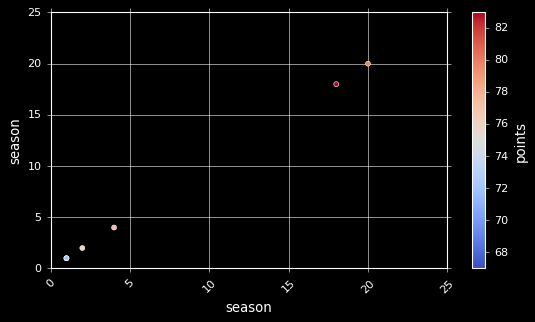

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
# plt.style.use('classic')
plt.style.use('dark_background')


df_result.plot(kind='scatter',figsize=(8,4), x='season',y='season',c='points',colormap='coolwarm')
plt.xticks(rotation=45)
plt.show()
# sns.scatterplot(data=df_result,x='club',y='points')


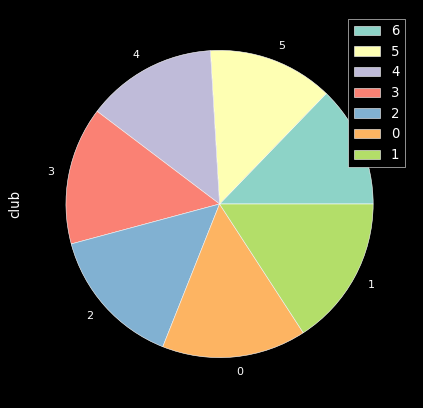

In [170]:
df_result[['club','points']].plot(kind='pie',y='points',label='club')

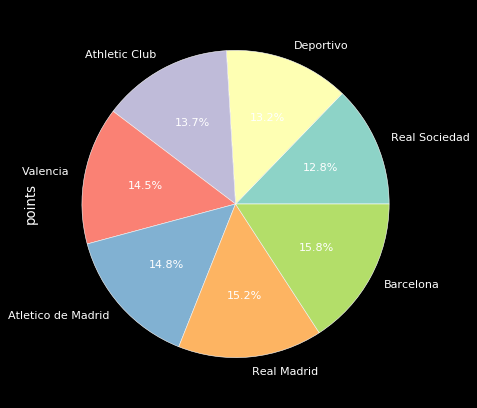

In [171]:
df_pie = df_result.copy()
df_pie.index = df_result['club']
df_pie.plot.pie(y='points', legend=False, autopct="%.1f%%")
plt.show()
